In [ ]:
# %pip install ..\..\.venv\GDAL-3.4.3-cp311-cp311-win_amd64.whl

## Required Packages

In [ ]:
import ee
import geemap
import rasterio
import numpy as np
import matplotlib.pyplot as plt

import xarray
# import netCDF4
# import h5netcdf
# from osgeo import gdal

import yaml 


In [ ]:
def auth_and_init(config):
    proj = config['project']
    ee.Authenticate()
    ee.Initialize(project=proj)
    
def load_data(config, collections):
    coords = config['coords']
    time_window = config['time_window']
    
    gge_coords = ee.Geometry.Rectangle(coords=coords)
    gge_time_window = ee.DateRange(time_window.split('/')[0], time_window.split('/')[1])

    data_dict = {}
    for key, value in collections.items():
        collection_name = value['name']
        bands = value['bands']

        dataset = ee.ImageCollection(collection_name) \
            .filterDate(gge_time_window) \
            .filterBounds(gge_coords) \
            .select(bands) \
            .mean()
        
        data_dict[key] = dataset
        
    return data_dict

if __name__ == "__main__":
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)

    config = config['gge_engine_config']
    collections = config['collections']['aq_collections']
    
    auth_and_init(config)
    data = load_data(config, collections)

In [10]:
data

{'co_collection': <ee.image.Image at 0x1bb9243ad90>,
 'hcho_collection': <ee.image.Image at 0x1bb9243afd0>,
 'no2_collection': <ee.image.Image at 0x1bb924a4490>,
 'o3_collection': <ee.image.Image at 0x1bb924a52d0>,
 'so2_collection': <ee.image.Image at 0x1bb924a5c10>,
 'aod_collection': <ee.image.Image at 0x1bb924a6c50>}

## Authenticaion and Initialization

In [11]:
# Authenticaion and Initialization
ee.Authenticate()
ee.Initialize(project="ee-leolincoln9804")

In [12]:
# Define the Geological Range and Time Window
coords = ee.Geometry.Rectangle([-74.01, 40.75, -73.86, 40.88])
time_window = ee.DateRange("2021-06-01", "2021-09-01")

# Collection
collection = "MODIS/061/MCD19A2_GRANULES"

## Data Retrieval

In [29]:
dataset = ee.ImageCollection(collection) \
    .filterDate(time_window) \
    .filterBounds(coords) \
    .median() \

bands_names = [
    "Optical_Depth_047",
    "Optical_Depth_055",
    "AOD_Uncertainty",
    "FineModeFraction",
    "Column_WV",
    "Injection_Height",
    "AOD_QA",
    "AngstromExp_470-780"
    # "cosSZA",
    # "cosVZA",
    # "RelAZ",
    # "Scattering_Angle",
    # "Glint_Angle"
]

aod = dataset.select(bands_names)

aod.bandNames().getInfo()

['Optical_Depth_047',
 'Optical_Depth_055',
 'AOD_Uncertainty',
 'FineModeFraction',
 'Column_WV',
 'Injection_Height',
 'AOD_QA',
 'AngstromExp_470-780']

In [30]:
SAVE_DIR = "../data/AOD/air_quality/"

output_file = "AOD_NewYork_Summer2021(median).tif"
geemap.ee_export_image(
    aod, 
    filename=SAVE_DIR+output_file, 
    scale=1000, 
    region=coords, 
    file_per_band=False
)

Generating URL ...
Please wait ...
An error occurred while downloading.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

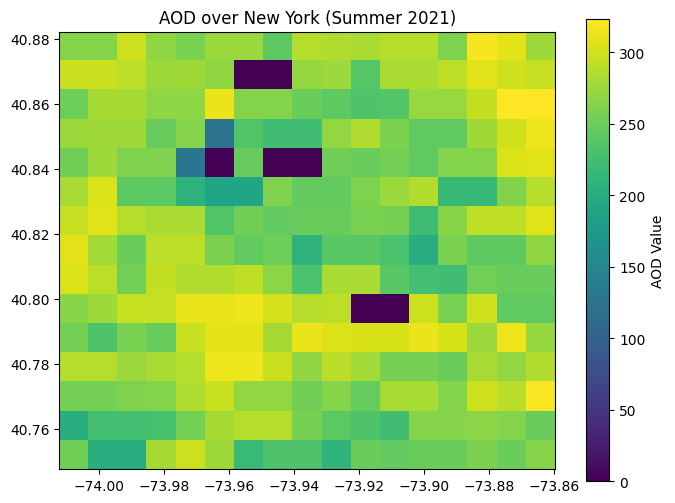

array([[264. , 264. , 299. , 269. , 258. , 275. , 275. , 241.5, 287. ,
        285. , 282. , 287. , 287. , 260. , 319. , 309.5, 276. ],
       [297. , 297. , 290.5, 276. , 277.5, 269. ,   0. ,   0. , 271.5,
        276. , 238. , 282. , 282. , 291. , 309. , 300. , 294. ],
       [252. , 280. , 280. , 268. , 268. , 314. , 263. , 263. , 249.5,
        243. , 234. , 236. , 273. , 273. , 293. , 322. , 323. ],
       [274. , 277.5, 277.5, 248.5, 264. , 123. , 235. , 224. , 224. ,
        270.5, 284.5, 259.5, 244. , 244. , 276.5, 300. , 314.5],
       [253. , 276. , 261. , 261. , 127. ,   0. , 247.5,   0. ,   0. ,
        252.5, 249. , 255.5, 244.5, 263. , 263. , 305. , 309. ],
       [280.5, 305. , 242. , 242. , 209. , 191. , 191. , 261. , 245.5,
        245.5, 260. , 275. , 286. , 217. , 217. , 262. , 286.5],
       [294. , 308.5, 287. , 282.5, 282.5, 235. , 253. , 246. , 248.5,
        248.5, 258.5, 257. , 223. , 266. , 291.5, 291.5, 307.5],
       [308. , 278. , 251. , 290.5, 290.5, 259. 

In [31]:
# tif. file path
tif_file = "..\\data\\air_quality\\AOD\\AOD_NewYork_Summer2021(median).tif"

# Open tif. file
with rasterio.open(tif_file) as src:
    aod_data = src.read(1)  # Đọc band đầu tiên
    profile = src.profile  # Metadata của file
    bounds = src.bounds


# print("Metadata")
# for key, value in profile.items():
#     print(f"{key}: {value}")



plt.figure(figsize=(8, 6))
plt.imshow(aod_data, cmap="viridis", interpolation="nearest", 
           extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.colorbar(label="AOD Value")
plt.title("AOD over New York (Summer 2021)")
plt.show()

aod_data

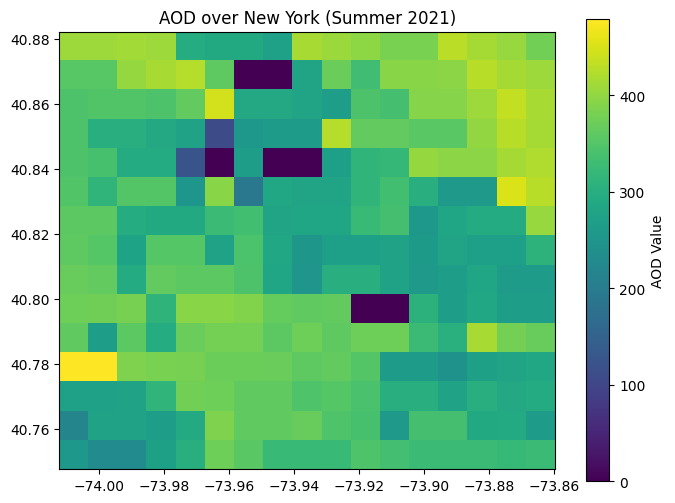

array([[408.67391304, 408.67391304, 411.35416667, 408.02040816,
        297.02439024, 291.39534884, 291.39534884, 273.15384615,
        415.25641026, 406.02380952, 397.74468085, 381.94444444,
        381.94444444, 428.61538462, 414.30188679, 405.5       ,
        377.50909091],
       [354.5       , 354.5       , 403.64      , 415.2244898 ,
        425.5       , 360.57142857,   0.        ,   0.        ,
        279.41666667, 370.45238095, 332.64444444, 392.98148148,
        392.98148148, 394.79245283, 427.55319149, 413.58      ,
        408.31481481],
       [345.23913043, 349.21276596, 349.21276596, 345.20930233,
        362.91304348, 445.3       , 289.78787879, 289.78787879,
        278.90625   , 265.91891892, 345.04651163, 337.36734694,
        390.83673469, 390.83673469, 408.02      , 435.26      ,
        416.25454545],
       [344.4893617 , 301.81818182, 301.81818182, 289.525     ,
        275.08108108, 109.4       , 255.46666667, 262.75862069,
        262.75862069, 425.38095238,

In [32]:
# tif. file path
tif_file = "..\\data\\air_quality\\AOD\\AOD_NewYork_Summer2021(mean).tif"

# Open tif. file
with rasterio.open(tif_file) as src:
    aod_data = src.read(1)  # Đọc band đầu tiên
    profile = src.profile  # Metadata của file
    bounds = src.bounds


# print("Metadata")
# for key, value in profile.items():
#     print(f"{key}: {value}")



plt.figure(figsize=(8, 6))
plt.imshow(aod_data, cmap="viridis", interpolation="nearest", 
           extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.colorbar(label="AOD Value")
plt.title("AOD over New York (Summer 2021)")
plt.show()

aod_data